# Question 1 <div style="text-align: right"> [10 pts] </div>

### 1. Import Libraries (keep them here for clarity) <div style="text-align: right"> [0.25 pts] </div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

### 2. Load the dataset <div style="text-align: right"> [0.5 pts] </div>

#### Use : 'boston housing' dataset from sklearn

In [2]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
print(data.shape)

(506, 13)


### 3.  Seggregate data in variables <div style="text-align: right"> [0.25 pts] </div>

In [3]:
X = data  # Features
y = target  # Target variable

### 4.  Convert in Pandas Dataframe and show as below <div style="text-align: right"> [0.25 pts] </div>

In [4]:
column_names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]
df = pd.DataFrame(X, columns=column_names)

# Display the DataFrame
print(df)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

### 5.  Split the dataset into training and testing sets <div style="text-align: right"> [0.5 pts] </div>

#### Note : test size --> 20% and random state ---> 111

In [5]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=111)

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (404, 13)
X_test shape: (102, 13)
y_train shape: (404,)
y_test shape: (102,)


### 6. Explain the differences between Linear /  Ridge regression <div style="text-align: right"> [1 pts] </div>

#### 6.1. Magnitude of Coefficients:

Linear Regression has the potential to overfit when there are many features relative to the number of observations in the training data. Without regularization, it may assign large coefficients to features, including those that capture noise in the data.


Ridge Regression uses L2 regularization, which adds a penalty term to the linear regression objective function. As a result, Ridge Regression tends to shrink the magnitude of the coefficients toward zero. Coefficients in Ridge Regression tend to be smaller compared to those in Linear Regression.


#### 6.2. Fitting (Over/Under):

Linear Regression has the potential to overfit when there are many features relative to the number of observations in the training data. Without regularization, it may assign large coefficients to features, including those that capture noise in the data.


Ridge Regression is designed to prevent overfitting. By adding the L2 penalty term, it discourages the model from assigning very large coefficients. This helps in balancing the trade-off between fitting the training data closely and avoiding overfitting.

#### 6.3. Feature Importance:

In Linear Regression, feature importance is directly related to the magnitude and sign of the coefficients. Positive coefficients indicate a positive relationship with the target, while negative coefficients indicate a negative relationship.

Ridge Regression also provides information about feature importance, but it tends to distribute importance more evenly among correlated features. This can be beneficial in the presence of multicollinearity, where Linear Regression may give disproportionately high importance to correlated features.

#### 6.4. Model Complexity:

Linear Regression models have low complexity. They are simple and have a straightforward interpretation. The model does not add any complexity beyond the linear relationships between features and the target.

Ridge Regression adds complexity through the regularization term. While it maintains the linear relationships, it introduces a penalty that can control the complexity of the model.

### 7. Implement Linear Regression - sklearn <div style="text-align: right"> [1 pts] </div>

In [6]:
# Create a Linear Regression model
linear_model = LinearRegression()

# Fit the model to the training data
linear_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = linear_model.predict(X_test)

# Evaluate the model
linear_mse = mean_squared_error(y_test, y_pred)
linear_r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", linear_mse)
print("R-squared:", linear_r2)

Mean Squared Error: 23.066428424068256
R-squared: 0.7456651065331126


### 8. Implement Ridge Regression with lambda = 1.0 - sklearn <div style="text-align: right"> [1 pts] </div>

In [7]:
# Create a Ridge Regression model with alpha (lambda) equal to 1.0
alpha = 1.0
ridge_model = Ridge(alpha=alpha)

# Fit the model to the training data
ridge_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ridge_model.predict(X_test)

# Evaluate the model
ridge_mse = mean_squared_error(y_test, y_pred)
ridge_r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", ridge_mse)
print("R-squared:", ridge_r2)

Mean Squared Error: 23.63737071708968
R-squared: 0.7393697865727918


### 9. Evaluate the models (M.S.E) <div style="text-align: right"> [0.5 pts] </div>

In [8]:
print("Linear Regression Mean Squared Error:", linear_mse)
print("Ridge Regression Mean Squared Error:", ridge_mse)

Linear Regression Mean Squared Error: 23.066428424068256
Ridge Regression Mean Squared Error: 23.63737071708968


### 10. Plot the coefficients of Linear and Ridge Regression models <div style="text-align: right"> [0.5 pts] </div>

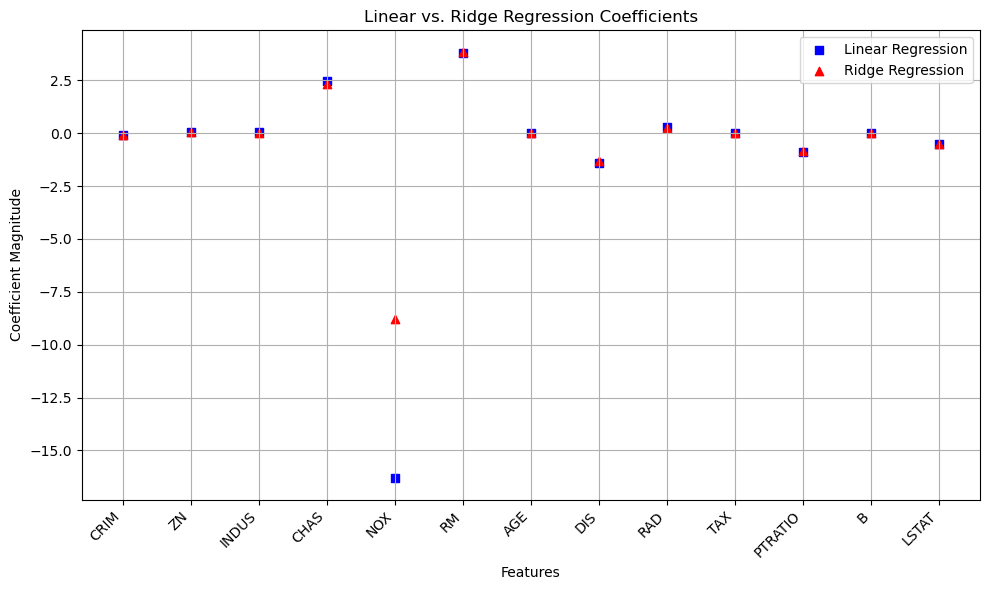

In [9]:
# Get the coefficients from the Linear Regression model
linear_coefs = linear_model.coef_

# Get the coefficients from the Ridge Regression model
ridge_coefs = ridge_model.coef_

# Create an array of feature names (assuming you have them)
feature_names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot coefficients for Linear Regression
plt.scatter(range(len(feature_names)), linear_coefs, marker='s', label='Linear Regression', color='blue')

# Plot coefficients for Ridge Regression
plt.scatter(range(len(feature_names)), ridge_coefs, marker='^', label='Ridge Regression', color='red')

# Set x-axis labels as feature names
plt.xticks(range(len(feature_names)), feature_names, rotation=45, ha='right')

# Set axis labels and title
plt.xlabel('Features')
plt.ylabel('Coefficient Magnitude')
plt.title('Linear vs. Ridge Regression Coefficients')

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

### 11. What are the 'N' most important features in our data according to your graph? <div style="text-align: right"> [0.25 pts] </div>

In [10]:
N = 6  # Number of most important features to select

# Create a list of (feature, coefficient) tuples for Ridge Regression
ridge_coef_tuples = list(zip(feature_names, ridge_coefs))

# Sort the tuples by the absolute magnitude of the coefficient (in descending order)
ridge_coef_tuples.sort(key=lambda x: abs(x[1]), reverse=True)

# Select the top N features
top_N_features = ridge_coef_tuples[:N]

# Print the top N features and their coefficients
print(f"The {N} most important features according to Ridge Regression:")
for feature, coef in top_N_features:
    print(f"{feature}: {coef:.4f}")

The 6 most important features according to Ridge Regression:
NOX: -8.7993
RM: 3.8494
CHAS: 2.3185
DIS: -1.3113
PTRATIO: -0.8380
LSTAT: -0.5233


### 12. Remove All other features and keep your selected 'N' features <div style="text-align: right"> [0.25 pts] </div>

In [11]:
X_df = pd.DataFrame(X, columns=feature_names)

# Select the 6 most important features based on Ridge Regression
selected_features = [ 'CHAS','NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT']

# Create a new DataFrame with only the selected features
X_selected = X_df[selected_features]

# Print the first few rows of the new DataFrame
print(X_selected.head())

   CHAS    NOX     RM     DIS  PTRATIO  LSTAT
0   0.0  0.538  6.575  4.0900     15.3   4.98
1   0.0  0.469  6.421  4.9671     17.8   9.14
2   0.0  0.469  7.185  4.9671     17.8   4.03
3   0.0  0.458  6.998  6.0622     18.7   2.94
4   0.0  0.458  7.147  6.0622     18.7   5.33


### 13. Re calculate the M.S.E  <div style="text-align: right"> [1.5 pts] </div>

In [12]:
# Create a DataFrame with only the selected features
X_selected = X_df[selected_features]

# Split the selected data into training and testing sets
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=111)

# Create and fit a Linear Regression model
linear_model_selected = LinearRegression()
linear_model_selected.fit(X_train_selected, y_train)

# Make predictions using the Linear Regression model
linear_pred_selected = linear_model_selected.predict(X_test_selected)

# Calculate the Mean Squared Error for Linear Regression with selected features
linear_mse_selected = mean_squared_error(y_test, linear_pred_selected)

# Create and fit a Ridge Regression model with alpha (lambda) equal to 1.0
alpha = 1.0
ridge_model_selected = Ridge(alpha=alpha)
ridge_model_selected.fit(X_train_selected, y_train)

# Make predictions using the Ridge Regression model
ridge_pred_selected = ridge_model_selected.predict(X_test_selected)

# Calculate the Mean Squared Error for Ridge Regression with selected features
ridge_mse_selected = mean_squared_error(y_test, ridge_pred_selected)

# Print the MSE for both models with selected features
print("Linear Regression Mean Squared Error (Selected Features):", linear_mse_selected)
print("Ridge Regression Mean Squared Error (Selected Features):", ridge_mse_selected)

Linear Regression Mean Squared Error (Selected Features): 25.211650120972138
Ridge Regression Mean Squared Error (Selected Features): 25.708351195059535


### 14. Re Plot the coefficients  <div style="text-align: right"> [0.25 pts] </div>

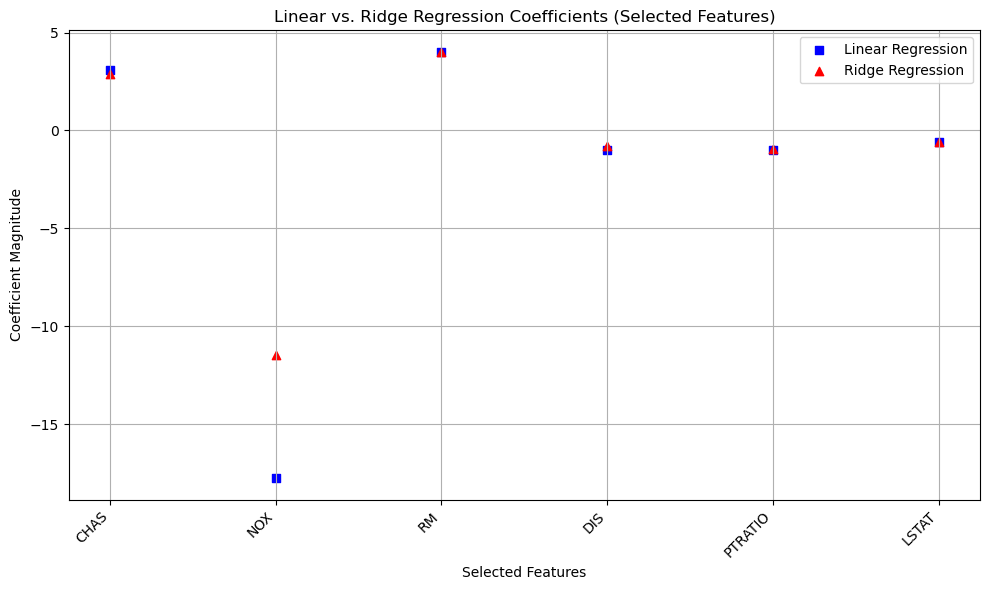

In [13]:
# Get the coefficients from the Linear Regression model with selected features
linear_coefs_selected = linear_model_selected.coef_

# Get the coefficients from the Ridge Regression model with selected features
ridge_coefs_selected = ridge_model_selected.coef_

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot coefficients for Linear Regression with selected features
plt.scatter(range(len(selected_features)), linear_coefs_selected, marker='s', label='Linear Regression', color='blue')

# Plot coefficients for Ridge Regression with selected features
plt.scatter(range(len(selected_features)), ridge_coefs_selected, marker='^', label='Ridge Regression', color='red')

# Set x-axis labels as feature names
plt.xticks(range(len(selected_features)), selected_features, rotation=45, ha='right')

# Set axis labels and title
plt.xlabel('Selected Features')
plt.ylabel('Coefficient Magnitude')
plt.title('Linear vs. Ridge Regression Coefficients (Selected Features)')

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

### 15. Do you think you picked the correct 'N' features? Explain your rationale.! <div style="text-align: right"> [0.5 pts] </div>

Yes, I think i picked the correct top 6 parameters. As these have the largest magnitudes and other were close to zero so have less impact on prediction.

### 16. Write About (what are they and what do they impact) <div style="text-align: right"> [0.5 pts] </div>

#### 16.1. Magnitude of Coefficients

The magnitude of coefficients in a regression model refers to the absolute values of the coefficients associated with each feature or predictor variable. These coefficients play a fundamental role in linear regression models and have a significant impact on the model's behavior and performance.
In linear regression, the magnitude of coefficients indicates the strength of the relationship between each feature and the target variable. Larger coefficient magnitudes suggest a stronger impact on the target variable, while smaller magnitudes suggest a weaker impact.
In Ridge Regression, the regularization term introduces a penalty on the magnitude of coefficients. As the magnitude of coefficients increases, the penalty also increases, which can lead to coefficient shrinkage.

#### 16.2. Sign of Coefficients

The sign of coefficients in a regression model indicates the direction of the relationship between each feature and the target variable. Specifically, it tells us whether an increase in the feature's value is associated with an increase or decrease in the predicted target variable.

### 17.Why is there any difference between the coefficients of the two (linear/ridge) models (if any)? <div style="text-align: right"> [0.5 pts] </div>

The difference between the coefficients of linear regression and Ridge Regression models arises primarily due to the presence of regularization in Ridge Regression. Ridge Regression applies L2 regularization, which adds a penalty term to the linear regression objective function. Ridge Regression encourages the model to shrink the coefficients towards zero. 

### 18. What optimisation (cost reduction) method did you used? <div style="text-align: right"> [0.5 pts] </div>

Used the minimization of the residual sum of squares for Linear Regression.

Used the minimization of the residual sum of squares combined with a regularization term for Ridge Regression.

# Question 2(10 points)

You have been provided with a comprehensive dataset containing customer data collected during a recent marketing campaign. The primary objective of this assignment is to leverage machine learning techniques to predict whether a customer will respond positively (1) or negatively (0) to a promotional offer. The dataset encompasses a variety of customer attributes, including age, income, and previous purchase history.

a. Load and preprocess the dataset, preparing it for machine learning.

In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline

# Load the dataset
file_path = "Assignmnet2_Question2.csv"
df = pd.read_csv(file_path)

# Explore the dataset
print(df.head())
print(df.columns)





  ID;Year_Birth;Education;Marital_Status;Income;Kidhome;Teenhome;Dt_Customer;Recency;MntWines;MntFruits;MntMeatProducts;MntFishProducts;MntSweetProducts;MntGoldProds;NumDealsPurchases;NumWebPurchases;NumCatalogPurchases;NumStorePurchases;NumWebVisitsMonth;AcceptedCmp3;AcceptedCmp4;AcceptedCmp5;AcceptedCmp1;AcceptedCmp2;Complain;Z_CostContact;Z_Revenue;Response
0  5524;1957;Graduation;Single;58138;0;0;2012-09-...                                                                                                                                                                                                                                                                                                                      
1  2174;1954;Graduation;Single;46344;1;1;2014-03-...                                                                                                                                                                                                                              

b. Perform EDA on data

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

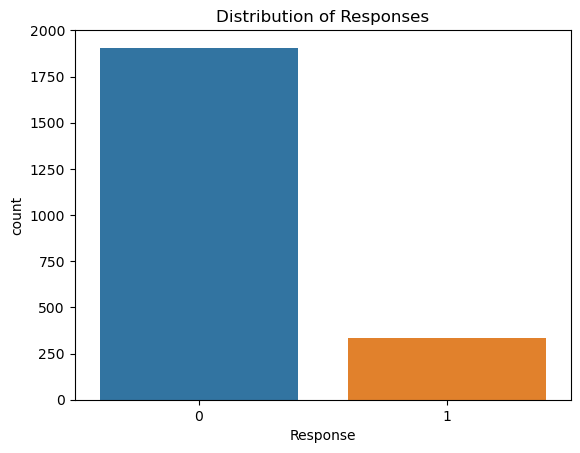

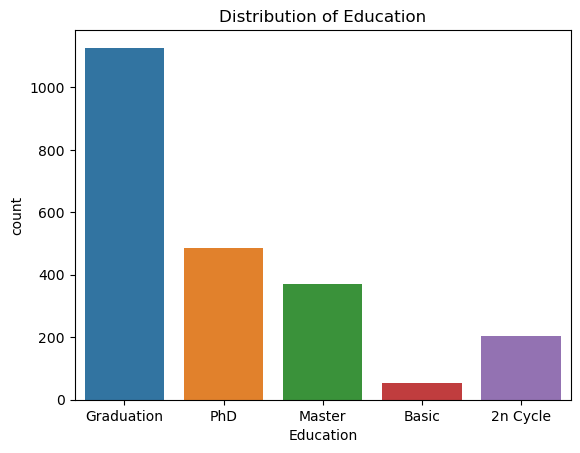

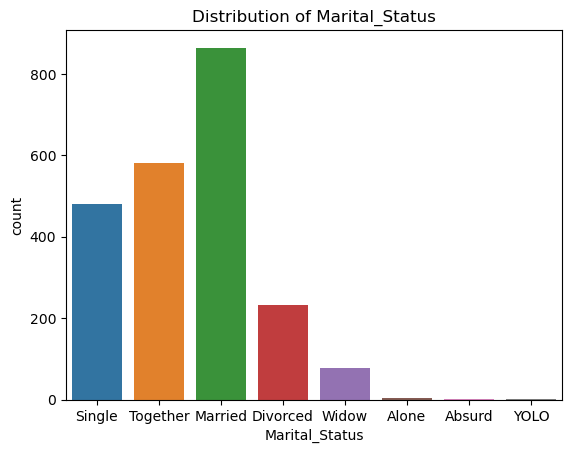

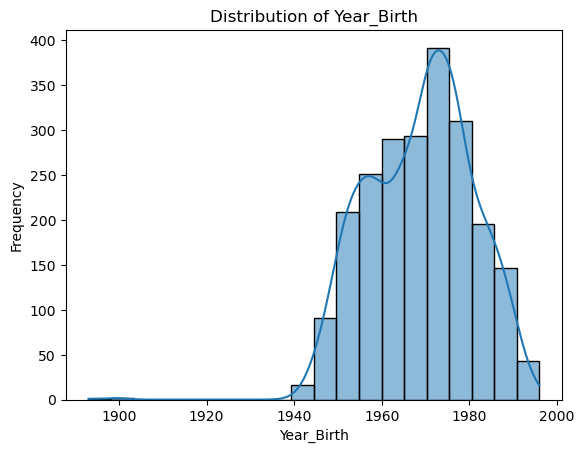

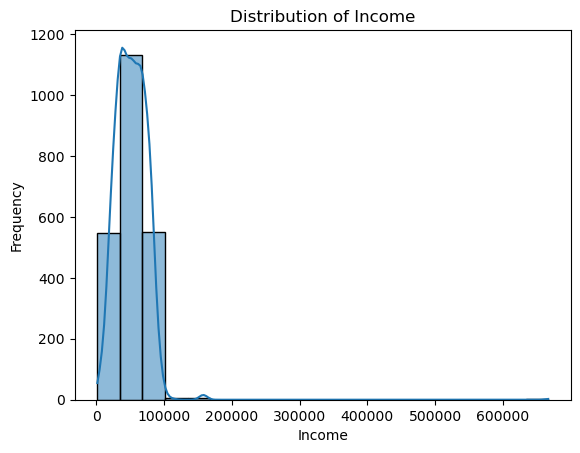

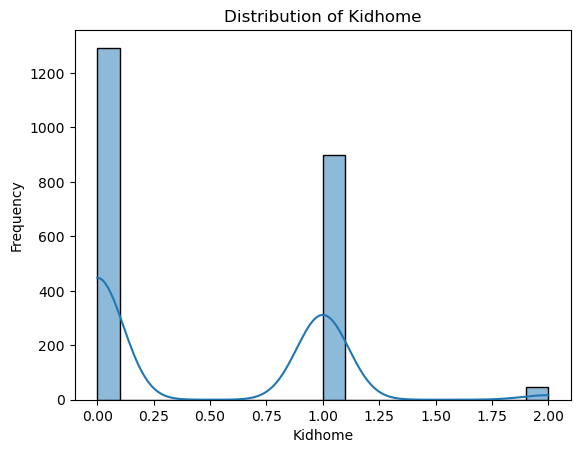

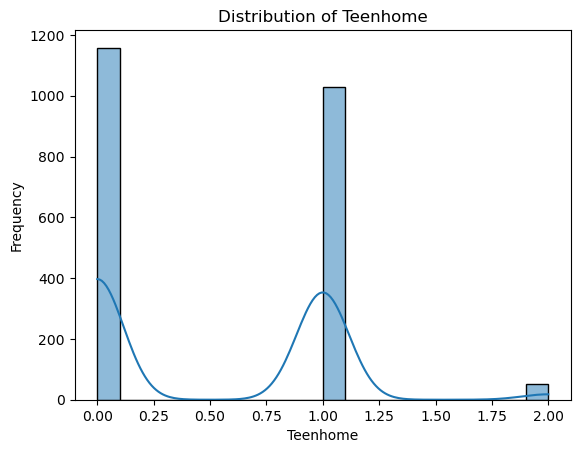

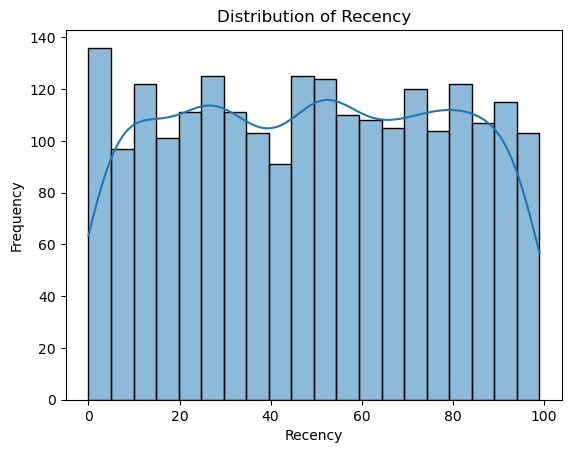

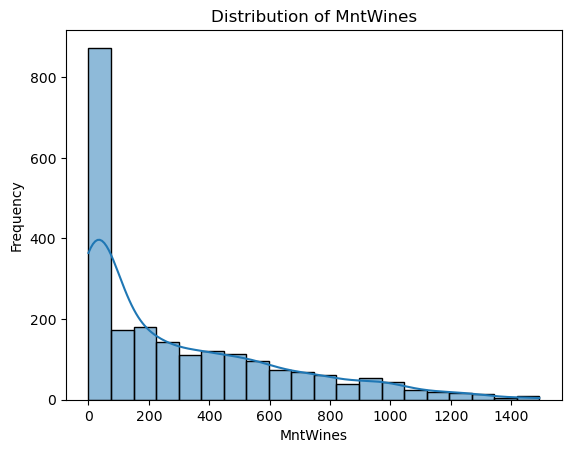

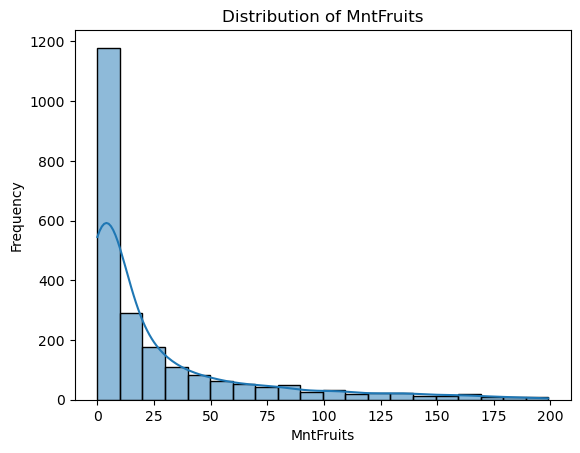

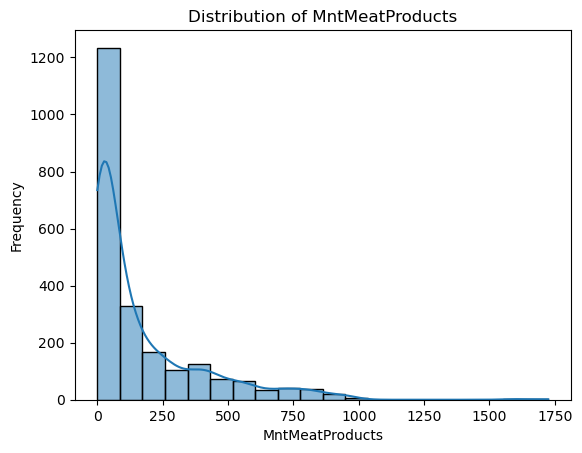

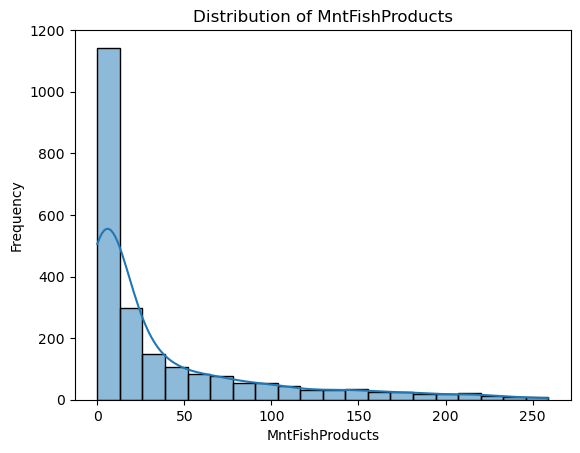

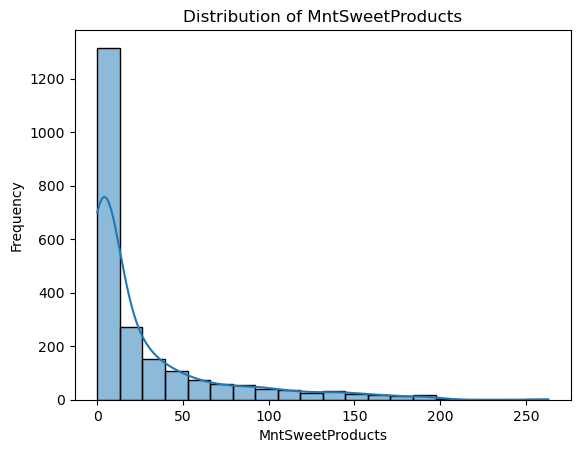

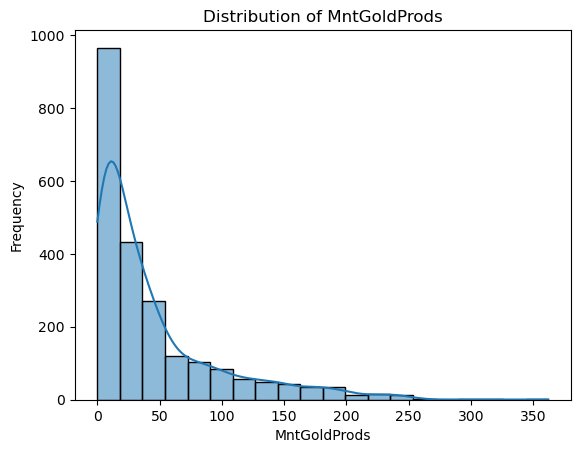

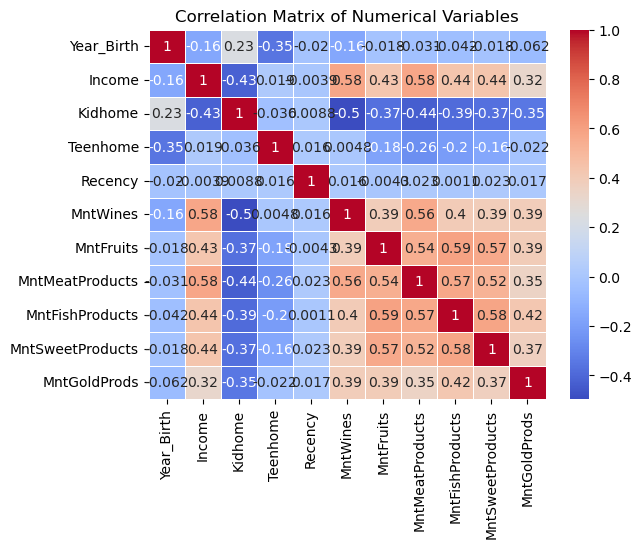

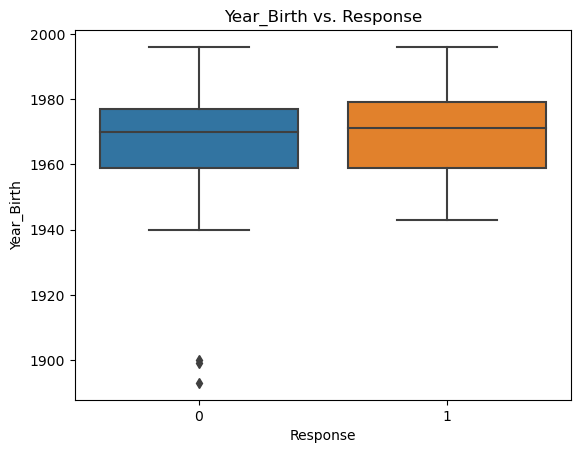

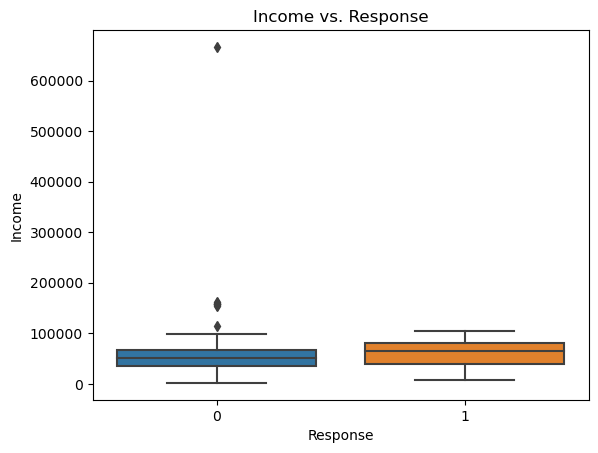

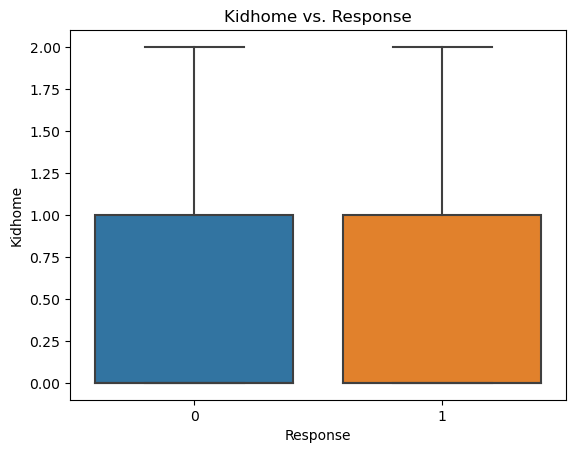

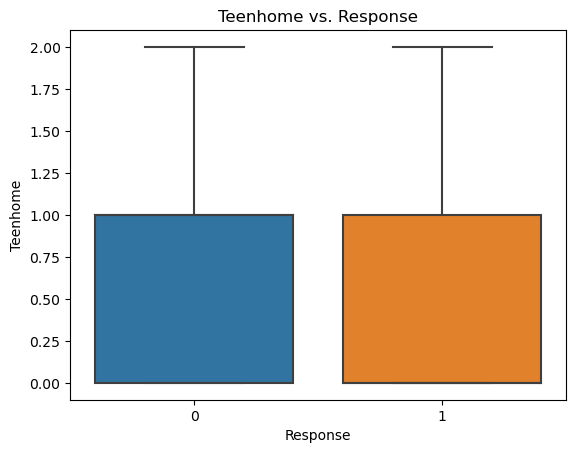

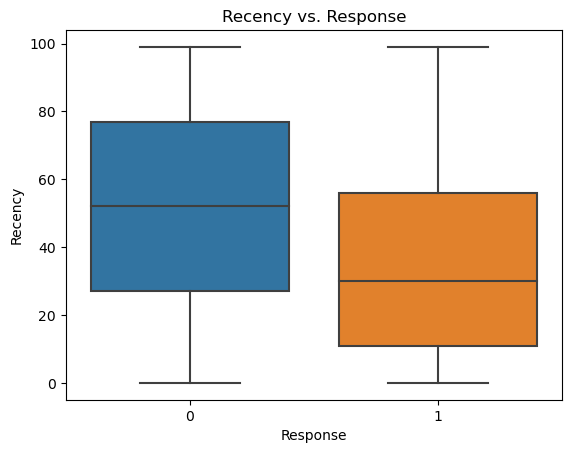

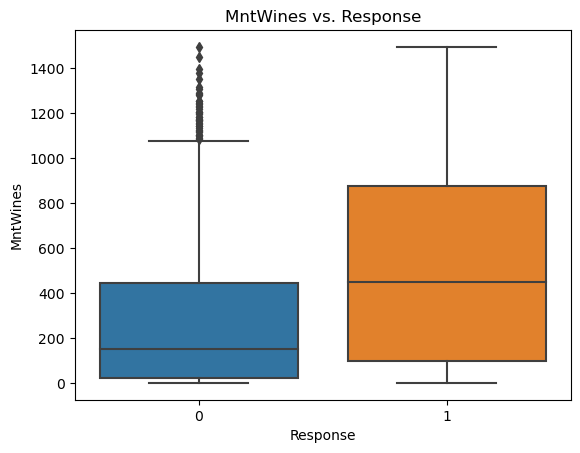

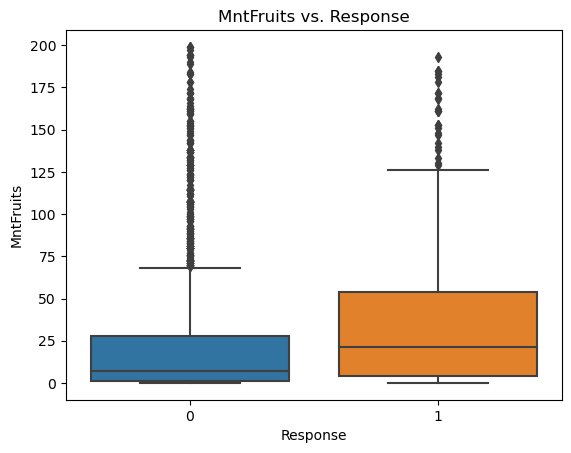

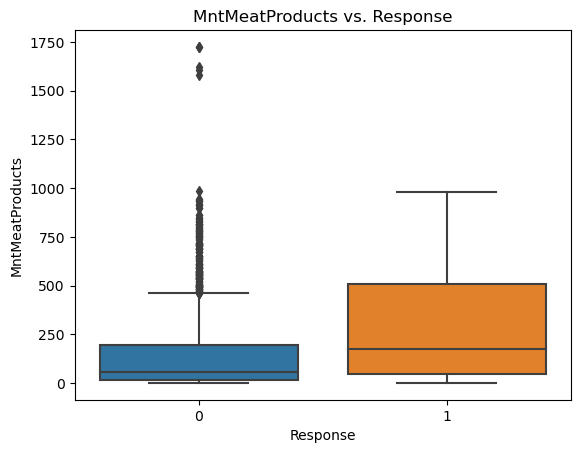

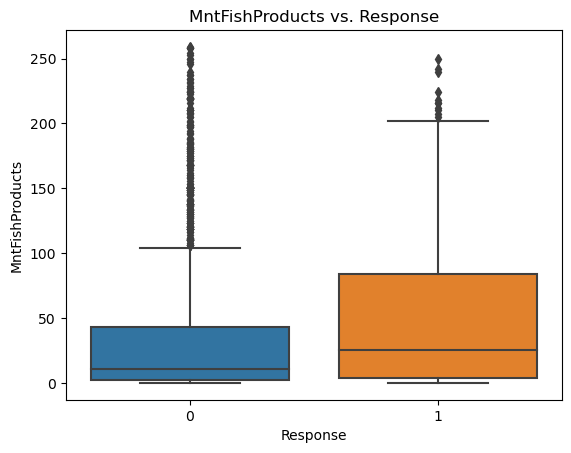

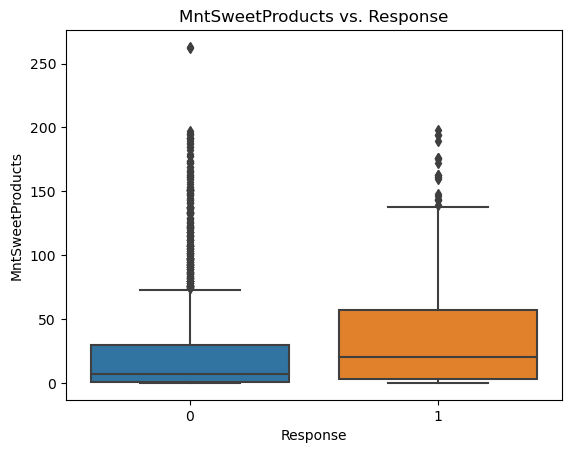

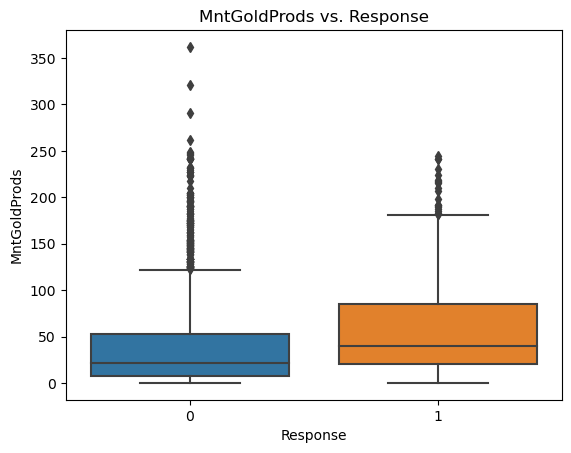

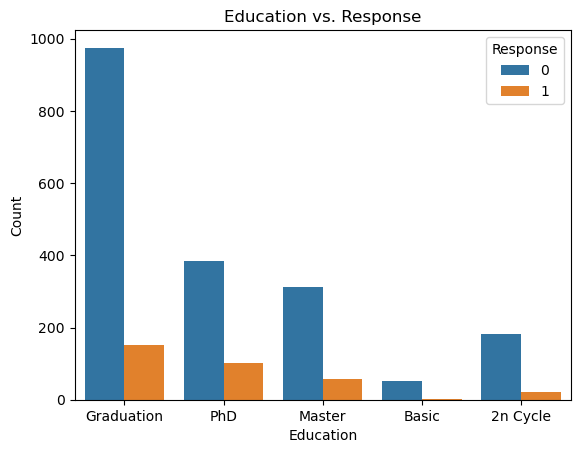

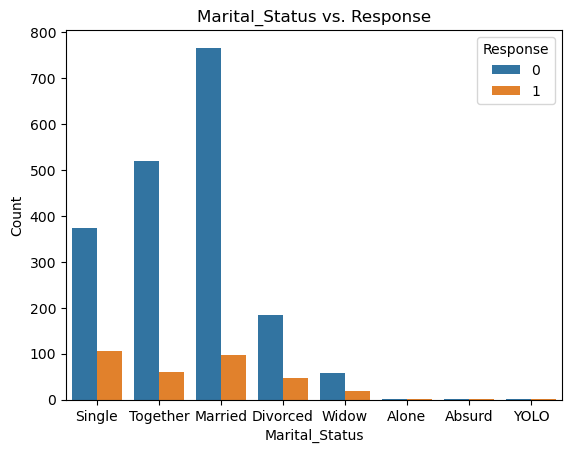

In [15]:
# Load the dataset
file_path = "Assignmnet2_Question2.csv"
df = pd.read_csv(file_path, delimiter=";")

# Explore the dataset
print(df.head())  # Display the first few rows of the dataset
print(df.info())  # Display information about the dataset, including data types and missing values

# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

numerical_columns = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Iterate through numerical columns and replace missing values with the mean
for column in numerical_columns:
    df[column].fillna(df[column].mean(), inplace=True)
    
# Check for missing values
print(df.isnull().sum())    

# Visualize the distribution of the target variable (Response)
sns.countplot(x='Response', data=df)
plt.title('Distribution of Responses')
plt.show()

# Visualize the distribution of categorical variables (e.g., Education, Marital_Status)
categorical_vars = ['Education', 'Marital_Status']
for var in categorical_vars:
    sns.countplot(x=var, data=df)
    plt.title(f'Distribution of {var}')
    plt.show()

# Visualize the distribution of numerical variables (e.g., Age, Income)
numerical_vars = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
for var in numerical_vars:
    sns.histplot(df[var], bins=20, kde=True)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

# Visualize correlations between numerical variables
correlation_matrix = df[numerical_vars].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

# Visualize relationships between numerical variables and the target variable
for var in numerical_vars:
    sns.boxplot(x='Response', y=var, data=df)
    plt.title(f'{var} vs. Response')
    plt.xlabel('Response')
    plt.ylabel(var)
    plt.show()

# Explore relationships between categorical variables and the target variable
for var in categorical_vars:
    sns.countplot(x=var, hue='Response', data=df)
    plt.title(f'{var} vs. Response')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.show()

c. Split the data into training and testing sets.

In [16]:

df.drop('Dt_Customer', axis=1, inplace=True)

# Convert categorical columns to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['Education', 'Marital_Status'])



X = df.drop(columns=['Response', 'ID'])  # Features
y = df['Response']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now standardize
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")



Training set size: 1792
Testing set size: 448


d. Train both a **Perceptron model and a Logistic Regression model** on the training data to predict customer responses to the promotional offer. (Note: Implement both the models from scratch, Don't use any pretrained model)

In [17]:

class Perceptron:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.lr = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        y_ = np.where(y <= 0, -1, 1) # Convert our y values into 1 and -1
        
        for _ in range(self.epochs):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.weights) + self.bias)
                if condition <= 0: # Misclassification
                    self.weights += self.lr * y_[idx] * x_i
                    self.bias += self.lr * y_[idx]
                    
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = np.where(linear_model > 0, 1, 0)
        return y_pred
    
class LogisticRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.lr = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self._sigmoid(linear_model)
            
            dw = (1/n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1/n_samples) * np.sum(y_predicted - y)
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self._sigmoid(linear_model)
        y_pred_cls = [1 if i > 0.5 else 0 for i in y_pred]
        return y_pred_cls
    
    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))




e. Evaluate the performance of both models using classification metrics such as accuracy, precision, recall, and F1-score on the testing data.

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Standardize the test data
X_test_std = scaler.transform(X_test)

# Train Perceptron
perceptron = Perceptron()
perceptron.fit(X_train_std, y_train)
y_pred_perc = perceptron.predict(X_test_std)

# Train Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train_std, y_train)
y_pred_log = logreg.predict(X_test_std)

# Evaluate
print("Perceptron Model:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_perc)}")
print(f"Precision: {precision_score(y_test, y_pred_perc)}")
print(f"Recall: {recall_score(y_test, y_pred_perc)}")
print(f"F1-Score: {f1_score(y_test, y_pred_perc)}")

print("\nLogistic Regression Model:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log)}")
print(f"Precision: {precision_score(y_test, y_pred_log)}")
print(f"Recall: {recall_score(y_test, y_pred_log)}")
print(f"F1-Score: {f1_score(y_test, y_pred_log)}")


Perceptron Model:
Accuracy: 0.8102678571428571
Precision: 0.35714285714285715
Recall: 0.2898550724637681
F1-Score: 0.32

Logistic Regression Model:
Accuracy: 0.8549107142857143
Precision: 0.5555555555555556
Recall: 0.2898550724637681
F1-Score: 0.380952380952381


f. Compare and contrast the performance of the Perceptron model and the Logistic Regression model. Which model performed better, and why? Discuss any differences in their decision boundaries and the interpretability of their results.

Accuracy measures the overall correctness of predictions. The Logistic Regression model has a higher accuracy, implying it's better at making correct predictions overall compared to the Perceptron.

Precision looks at the correctness of positive predictions. The Logistic Regression's precision is significantly higher, meaning it's more trustworthy when it predicts a positive response.

Recall assesses how well the model captures all the possible positive instances. Both models seem to have the same sensitivity towards capturing positive cases.

F1-score harmonizes precision and recall. The Logistic Regression's higher F1-score indicates a better balance between its precision and recall.


Decision Boundary: 
Perceptron is a linear classifier, meaning that it draws a straight line (in 2D), a flat plane (in 3D), or a hyperplane (in higher dimensions) to distinguish between the two classes. It does this by adjusting the weights based on the misclassified examples.

Like the Perceptron, Logistic Regression is also linear in nature. However, instead of a step function, it uses the logistic function (sigmoid) to estimate probabilities. If the estimated probability is greater than 0.5, it predicts the instance as positive, otherwise as negative.


Interpretability:
The Perceptron's weights can give us an indication of the importance of each feature. High absolute values of weights could mean high importance. 
Coefficients in Logistic Regression give insights into the odds of a data point being in a particular class. Specifically, the exponentiated coefficient for a feature tells you how much the odds multiply by for a unit increase in that feature, holding everything else constant. This makes it more interpretable, as you can quantify changes in probabilities with changes in feature values.


g. Provide recommendations on when to choose one model over the other for this specific marketing campaign scenario.

If interpretability and understanding the influence of specific features on the response are crucial, choose Logistic Regression.  If minimizing false positives is crucial, Logistic Regression is the better choice.  For very large datasets where speed is a concern, and the data might be linearly separable, consider starting with the Perceptron. 
For this specific marketing campaign scenario, given the importance of understanding customer behavior, the need for actionable insights, and the superior performance metrics provided, Logistic Regression seems to be the more suitable choice. Logistic Regression is the recommended choice for this marketing campaign due to its higher accuracy and precision. With better precision, the marketing team can be more confident that the resources spent on targeting individuals (based on the model's prediction) will yield better results.
 